Insurance fraud, especially in the automobile sector, is a growing concern for companies and policyholders alike. Fraudulent claims can lead to significant financial losses for insurance companies, inflated premiums for honest customers, and a general erosion of trust in the system.

This project aims to build a machine learning model that can accurately detect potential fraudulent claims in car insurance data. By analyzing historical claim data and identifying patterns typically associated with fraudulent behavior, this model can assist insurance companies in flagging high-risk claims for further investigation.

📌 Why is this important?
Cost Savings: Helps reduce financial losses due to fraudulent payouts.

Efficiency: Prioritizes investigation resources by flagging high-risk claims.

Trust: Maintains integrity and fairness in the insurance ecosystem.

Scalability: Allows for faster and automated fraud screening in real-time.

Through this project, we will explore data preprocessing, visualization, feature engineering, model training, and evaluation — all with the goal of building an effective fraud detection pipeline.



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The dataset is imported and briefly explored to understand its structure, check for missing data, and get a general sense of the distributions and types of information available.

In [5]:
df = pd.read_excel("fraudulent dataset.xlsx")

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [8]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


In [10]:
df.shape

(1000, 39)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [12]:
df.dtypes

,0
months_as_customer,int64
age,int64
policy_number,int64
policy_bind_date,datetime64[ns]
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64


In [13]:
df.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [15]:
df['fraud_reported'].value_counts()

,count
fraud_reported,
N,753
Y,247


In [16]:
df['incident_city'].value_counts()

,count
incident_city,
Springfield,157
Arlington,152
Columbus,149
Northbend,145
Hillsdale,141
Riverwood,134
Northbrook,122


We visualize key patterns in the dataset to understand city-wise incident distribution, fraud occurrence, incident types, claim amounts, and top car makes associated with fraud. These plots help uncover potential fraud indicators and trends.


In [17]:
numerical_columns = df.select_dtypes(include='number').columns
print("Numerical Columns:")
print(numerical_columns.tolist())

Numerical Columns:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


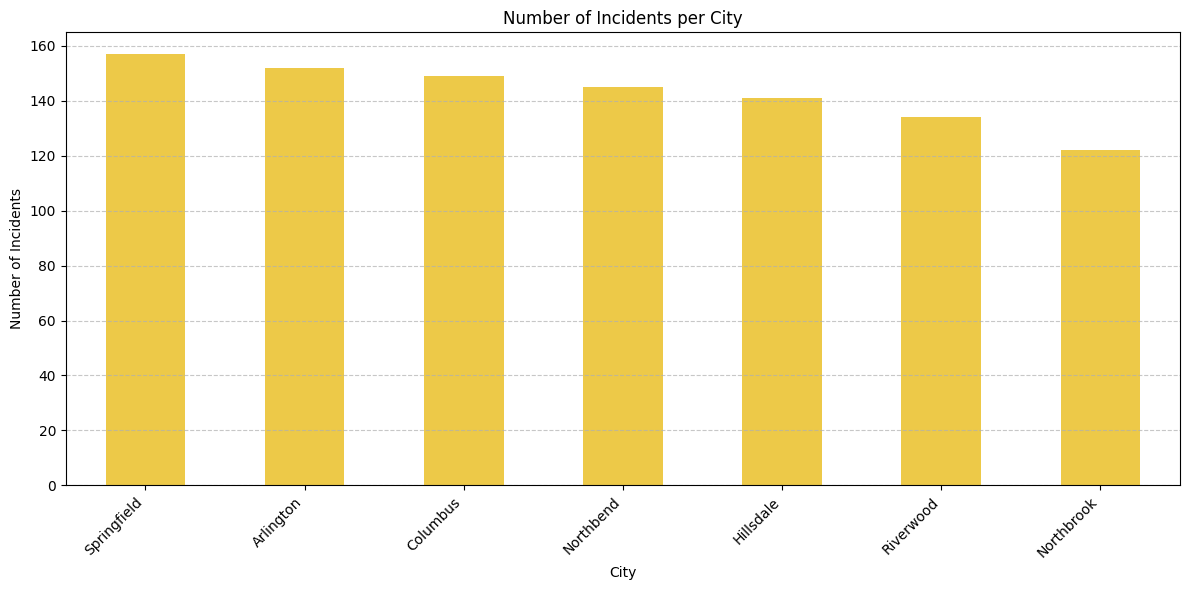

In [18]:
city_counts = df['incident_city'].value_counts()
#bar chart
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='#edc948')
plt.title('Number of Incidents per City')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-19-3219732675.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


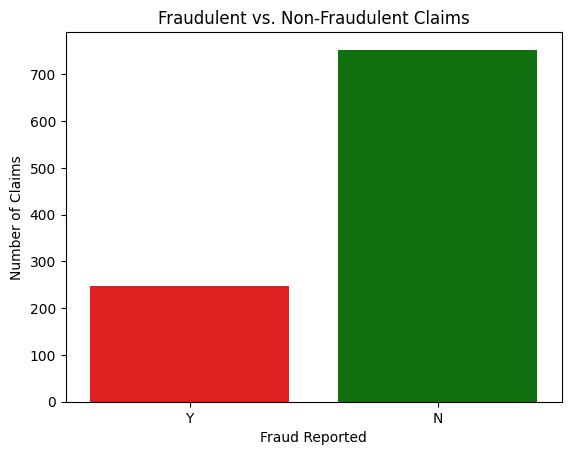

In [19]:
sns.countplot(
    x='fraud_reported',
    data=df,
    palette={'Y': 'red', 'N': 'green'}
)
plt.title('Fraudulent vs. Non-Fraudulent Claims')
plt.xlabel('Fraud Reported')
plt.ylabel('Number of Claims')
plt.show()

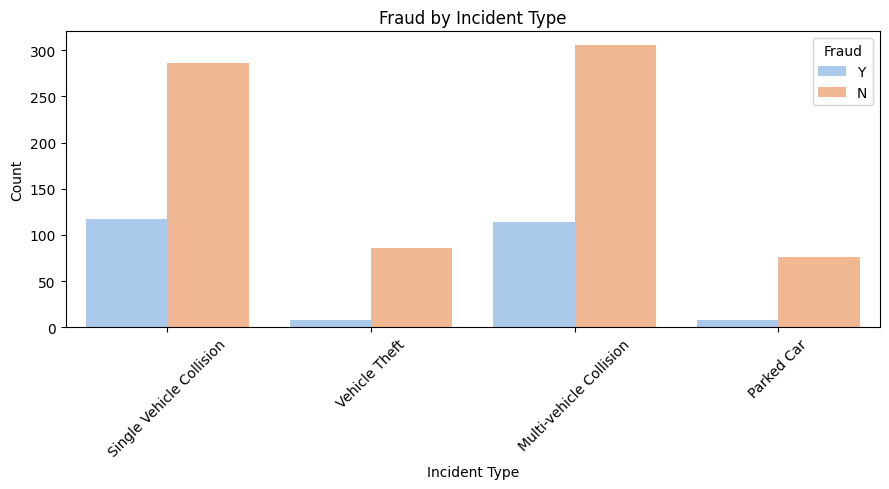

In [20]:

plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='incident_type', hue='fraud_reported', palette='pastel')
plt.title('Fraud by Incident Type')
plt.xticks(rotation=45)
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.tight_layout()
plt.show()


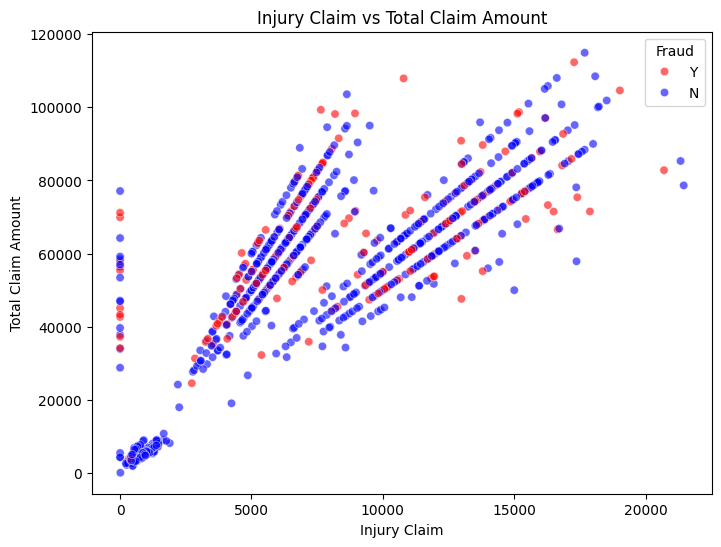

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='injury_claim', y='total_claim_amount', hue='fraud_reported', palette={'Y': 'red', 'N': 'blue'}, alpha=0.6)
plt.title('Injury Claim vs Total Claim Amount')
plt.xlabel('Injury Claim')
plt.ylabel('Total Claim Amount')
plt.legend(title='Fraud')
plt.show()


/tmp/ipython-input-22-2310901924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud_reported', y='total_claim_amount', palette='Set2')


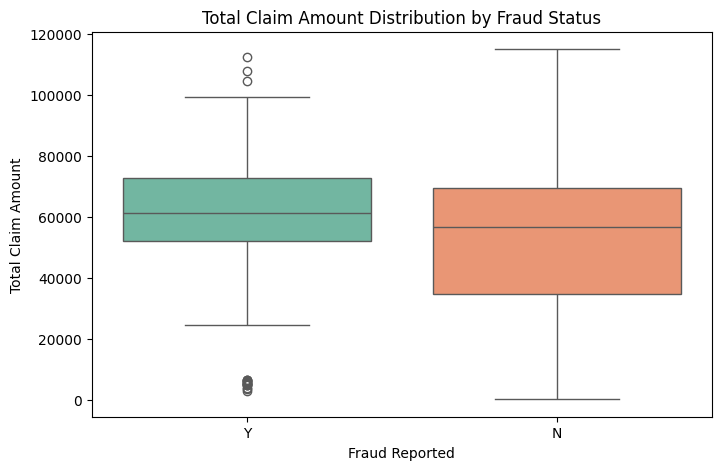

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='fraud_reported', y='total_claim_amount', palette='Set2')
plt.title('Total Claim Amount Distribution by Fraud Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.show()

/tmp/ipython-input-23-3163779628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='Set2')


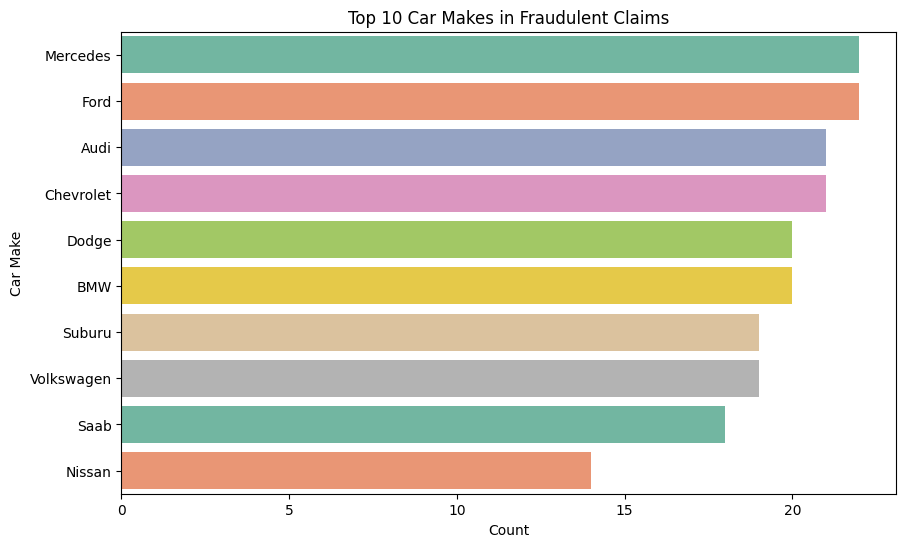

In [23]:
top_makes = df[df['fraud_reported'] == 'Y']['auto_make'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette='Set2')
plt.title('Top 10 Car Makes in Fraudulent Claims')
plt.xlabel('Count')
plt.ylabel('Car Make')
plt.show()

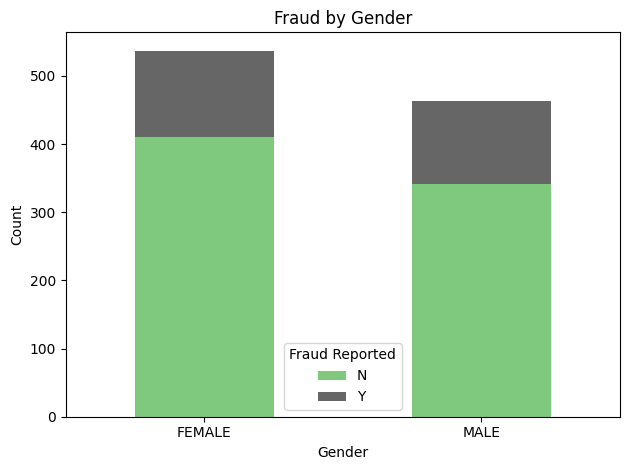

In [24]:
gender_fraud = df.groupby(['insured_sex', 'fraud_reported']).size().unstack()
gender_fraud.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fraud Reported')
plt.tight_layout()
plt.show()


/tmp/ipython-input-25-611832178.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


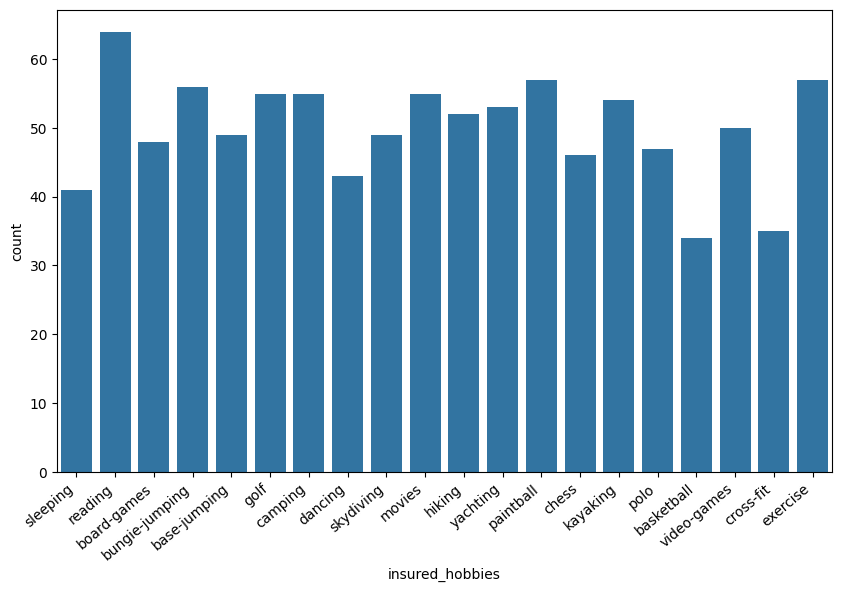

In [25]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns (and optionally scale them)
df_numeric = df.select_dtypes(include=['number']).dropna()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                        feature       VIF
15               property_claim       inf
14                 injury_claim       inf
16                vehicle_claim       inf
13           total_claim_amount       inf
1                           age  6.790447
0            months_as_customer  6.773985
10  number_of_vehicles_involved  1.099172
9      incident_hour_of_the_day  1.068207
12                    witnesses  1.023967
3             policy_deductable  1.022263
7                 capital-gains  1.016501
8                  capital-loss  1.015597
17                    auto_year  1.015469
4         policy_annual_premium  1.012599
6                   insured_zip  1.012211
11              bodily_injuries  1.011926
5                umbrella_limit  1.007713
2                 policy_number  1.005807


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [27]:
# LOW VARIANCE CHECK

from sklearn.feature_selection import VarianceThreshold
df_numeric = df.select_dtypes(include=['number'])

selector = VarianceThreshold(threshold=0.1)
selector.fit(df_numeric)

low_variance_columns = df_numeric.columns[~selector.get_support()]

print("Columns with low variance:")
print(low_variance_columns)

Columns with low variance:
Index([], dtype='object')


In [28]:
variances = pd.Series(selector.variances_, index=df_numeric.columns)
print(variances.sort_values())

bodily_injuries                6.719360e-01
number_of_vehicles_involved    1.037079e+00
witnesses                      1.233831e+00
auto_year                      3.615439e+01
incident_hour_of_the_day       4.827326e+01
age                            8.346130e+01
months_as_customer             1.323779e+04
policy_annual_premium          5.955810e+04
policy_deductable              3.740040e+05
property_claim                 2.325470e+07
injury_claim                   2.379987e+07
vehicle_claim                  3.563339e+08
total_claim_amount             6.963439e+08
capital-gains                  7.760820e+08
capital-loss                   7.890504e+08
insured_zip                    5.135980e+09
policy_number                  6.601531e+10
umbrella_limit                 5.272799e+12
dtype: float64


In [29]:
#Multicollinearity Check (VIF)

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns (and optionally scale them)
df_numeric = df.select_dtypes(include=['number']).dropna()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                        feature       VIF
15               property_claim       inf
14                 injury_claim       inf
16                vehicle_claim       inf
13           total_claim_amount       inf
1                           age  6.790447
0            months_as_customer  6.773985
10  number_of_vehicles_involved  1.099172
9      incident_hour_of_the_day  1.068207
12                    witnesses  1.023967
3             policy_deductable  1.022263
7                 capital-gains  1.016501
8                  capital-loss  1.015597
17                    auto_year  1.015469
4         policy_annual_premium  1.012599
6                   insured_zip  1.012211
11              bodily_injuries  1.011926
5                umbrella_limit  1.007713
2                 policy_number  1.005807


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


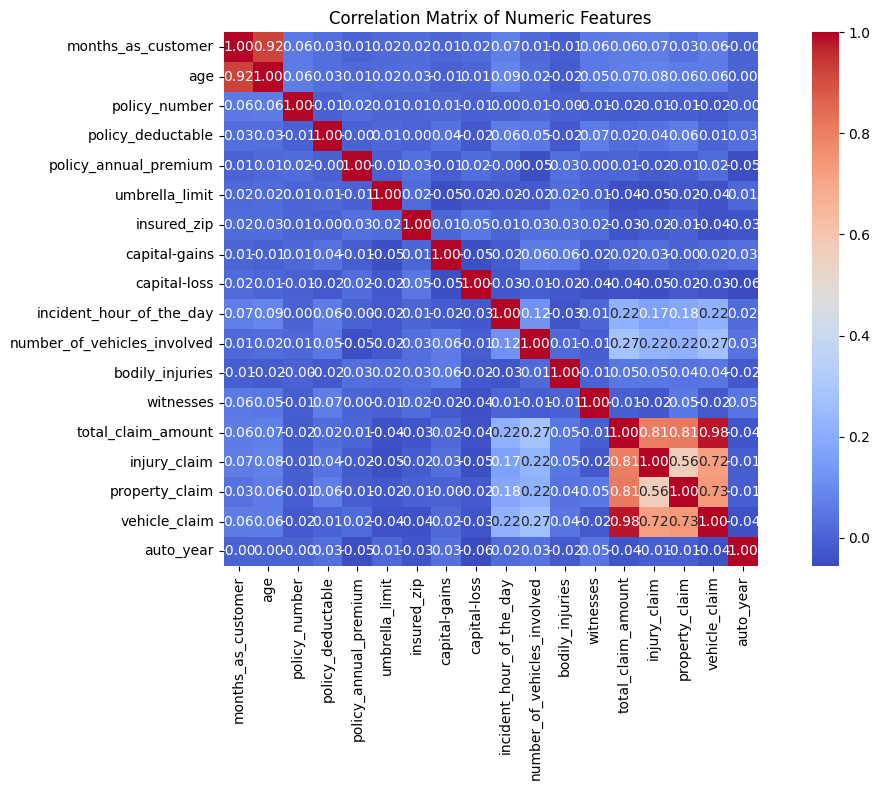

In [30]:
#Correlation Check

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [31]:
#SKEWNESS CHECK

df_numeric = df.select_dtypes(include=['number'])

# Calculate skewness
skewness = df_numeric.skew().sort_values(ascending=False)

# Print skewness
print("Skewness of numeric features:")
print(skewness)

Skewness of numeric features:
umbrella_limit                 1.806712
insured_zip                    0.816554
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
injury_claim                   0.264811
policy_number                  0.038991
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
incident_hour_of_the_day      -0.035584
auto_year                     -0.048289
capital-loss                  -0.391472
total_claim_amount            -0.594582
vehicle_claim                 -0.621098
dtype: float64


In [32]:
# OUTLIER CHECKS

# Step 1: Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 2: Define function to extract only outlier values
def show_only_outlier_values(data):
    outlier_values = pd.DataFrame(index=data.index)
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_col = data[col].where((data[col] < lower_bound) | (data[col] > upper_bound), np.nan)
        outlier_values[col] = outlier_col
    return outlier_values.dropna(how='all')

# Step 3: Define function for long format
def get_outlier_values_long_format(data):
    outlier_list = []
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        for idx, val in outliers.items():
            outlier_list.append({'Index': idx, 'Column': col, 'Outlier Value': val})
    return pd.DataFrame(outlier_list).sort_values(by='Index')

# Step 4: Apply functions
outlier_values_only = show_only_outlier_values(numeric_df)
print(outlier_values_only)

outlier_report = get_outlier_values_long_format(numeric_df)
print(outlier_report)


     months_as_customer  age  policy_number  policy_deductable  \
1                   NaN  NaN            NaN                NaN   
2                   NaN  NaN            NaN                NaN   
3                   NaN  NaN            NaN                NaN   
4                   NaN  NaN            NaN                NaN   
10                  NaN  NaN            NaN                NaN   
..                  ...  ...            ...                ...   
977                 NaN  NaN            NaN                NaN   
987                 NaN  NaN            NaN                NaN   
990                 NaN  NaN            NaN                NaN   
997                 NaN  NaN            NaN                NaN   
998                 NaN  NaN            NaN                NaN   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
1                      NaN       5000000.0          NaN            NaN   
2                      NaN       5000000.0          NaN    

In [33]:
## ---------------------- FEATURE ENGINEERING ----------------------

#  1. Ratios (Safe and meaningful predictors)
df['deductable_to_premium_ratio'] = df['policy_deductable'] / df['policy_annual_premium']
df['umbrella_to_premium_ratio'] = df['umbrella_limit'] / df['policy_annual_premium']

#  2. Capital gains/losses
df['net_capital'] = df['capital-gains'] - df['capital-loss']
df['had_capital_gain'] = (df['capital-gains'] > 0).astype(int)
df['had_capital_loss'] = (df['capital-loss'] > 0).astype(int)

#  3. Time-based features
def time_of_day(hour):
    if pd.isna(hour):
        return np.nan
    if 0 <= hour < 6:
        return 'late_night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['time_of_day'] = df['incident_hour_of_the_day'].apply(time_of_day)
df['is_peak_hour'] = df['incident_hour_of_the_day'].between(8, 18, inclusive='both').astype(int)

#  4. Severity-related (based on incident structure, not claim outcome)
df['incident_severity_score'] = (
    df['number_of_vehicles_involved'].fillna(0) +
    df['bodily_injuries'].fillna(0) +
    df['witnesses'].fillna(0)
)
df['has_witnesses'] = (df['witnesses'].fillna(0) > 0).astype(int)
df['has_injuries'] = (df['bodily_injuries'].fillna(0) > 0).astype(int)

#  5. Vehicle info
df['vehicle_age'] = 2025 - df['auto_year']
df['is_old_vehicle'] = (df['vehicle_age'] > 10).astype(int)

#  6. Zip code related features
df['zip_prefix'] = df['insured_zip'].astype(str).str[:3]
zip_counts = df['insured_zip'].value_counts()
df['zip_density'] = df['insured_zip'].map(zip_counts)

#  7. Clean up: Replace infinite values in non-target columns
columns_to_clean = df.columns.difference(['fraud_reported'])
df[columns_to_clean] = df[columns_to_clean].replace([np.inf, -np.inf], np.nan)




In [34]:
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print(correlation_matrix)

                             months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses   

In [35]:
# For all numeric columns
df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)

,0
zip_density,9.864173
umbrella_to_premium_ratio,2.011267
umbrella_limit,1.806712
deductable_to_premium_ratio,1.003694
insured_zip,0.816554
number_of_vehicles_involved,0.502664
age,0.478988
capital-gains,0.478850
policy_deductable,0.477887
property_claim,0.378169


In [36]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported',
       'deductable_to_premium_ratio', 'umbrella_to_premium_ratio',
       'net_capital', 'had_capital_gain', 'had_capital_loss', 'time_of_day',
       'is_peak_hour', 'incident_se

In [37]:
# Check unique values to confirm what we’re working with
print(df['fraud_reported'].unique())
print(df['fraud_reported'].dtype)



['Y' 'N']
object


In [38]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})


In [39]:
print(df['fraud_reported'].unique())  # Should return [1, 0]
print(df['fraud_reported'].dtype)     # Should be int64


[1 0]
int64


In [40]:
leakage_columns = [
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'incident_severity_score',
    'has_witnesses',
    'has_injuries'
]

df.drop(columns=leakage_columns, inplace=True)


In [41]:
print(df.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'deductable_to_premium_ratio',
       'umbrella_to_premium_ratio', 'net_capital', 'had_capital_gain',
       'had_capital_loss', 'time_of_day', 'is_peak_hour', 'vehicle_age',
       'is_old_vehicle', 'zip_prefix', 'zip_density'],
      dtype='object')


In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:\n", categorical_cols)


Categorical columns:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'time_of_day', 'zip_prefix']


In [43]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['insured_sex', 'property_damage', 'police_report_available']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [44]:
low_cardinality_cols = [
    'policy_state', 'policy_csl', 'insured_relationship',
    'incident_type', 'collision_type', 'incident_severity',
    'authorities_contacted', 'time_of_day'
]

df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)


In [45]:
high_cardinality_cols = [
    'insured_education_level', 'insured_occupation', 'insured_hobbies',
    'incident_state', 'incident_city', 'incident_location',
    'auto_make', 'auto_model', 'zip_prefix'
]

for col in high_cardinality_cols:
    freq = df[col].value_counts()
    df[col] = df[col].map(freq)


In [46]:
scale_cols = [
    'months_as_customer', 'age', 'policy_deductable',
    'policy_annual_premium', 'umbrella_limit', 'capital-gains',
    'capital-loss', 'incident_hour_of_the_day',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
    'deductable_to_premium_ratio', 'umbrella_to_premium_ratio',
    'net_capital', 'injury_to_total_ratio', 'vehicle_to_total_ratio',
    'property_to_total_ratio', 'vehicle_age', 'zip_density'
]


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ensure only existing columns are selected
scale_cols = [col for col in scale_cols if col in df.columns]

df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [48]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [49]:
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns
print(datetime_cols)


Index(['policy_bind_date', 'incident_date'], dtype='object')


In [50]:
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [53]:
y_pred = model.predict(X_test)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.735

Confusion Matrix:
 [[145   6]
 [ 47   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       151
           1       0.25      0.04      0.07        49

    accuracy                           0.73       200
   macro avg       0.50      0.50      0.46       200
weighted avg       0.63      0.73      0.66       200



In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [56]:
model.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [58]:
model.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.735

Confusion Matrix:
[[145   6]
 [ 47   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       151
           1       0.25      0.04      0.07        49

    accuracy                           0.73       200
   macro avg       0.50      0.50      0.46       200
weighted avg       0.63      0.73      0.66       200



In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.735

Confusion Matrix:
 [[145   6]
 [ 47   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       151
           1       0.25      0.04      0.07        49

    accuracy                           0.73       200
   macro avg       0.50      0.50      0.46       200
weighted avg       0.63      0.73      0.66       200



In [61]:
from sklearn.ensemble import RandomForestClassifier

# Use class_weight='balanced' to handle imbalance
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.765

Confusion Matrix:
[[149   2]
 [ 45   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       151
           1       0.67      0.08      0.15        49

    accuracy                           0.77       200
   macro avg       0.72      0.53      0.50       200
weighted avg       0.74      0.77      0.69       200



In [63]:
from sklearn.metrics import roc_auc_score

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


ROC AUC Score: 0.7876740100013515


In [64]:
#IMPORTANT MOVES ONLY THIS IS A CHECKPOST FR THE THINGS

In [65]:
pip install imbalanced-learn


In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [67]:
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns
print(datetime_cols)


Index([], dtype='object')


In [68]:
X = df.drop(columns=['fraud_reported', 'policy_bind_date', 'incident_date'])  # add any other datetime columns if needed
y = df['fraud_reported']


In [69]:
# Check datetime columns in the feature set
datetime_cols = X.select_dtypes(include=['datetime64']).columns
print(datetime_cols)


Index([], dtype='object')


In [70]:
# Drop datetime columns
X = X.drop(columns=datetime_cols)


In [71]:
print(X.dtypes)  # Ensure no datetime64 columns remain


months_as_customer                        float64
age                                       float64
policy_number                               int64
policy_deductable                         float64
policy_annual_premium                     float64
umbrella_limit                            float64
insured_zip                                 int64
insured_sex                                 int64
insured_education_level                     int64
insured_occupation                          int64
insured_hobbies                             int64
capital-gains                             float64
capital-loss                              float64
incident_state                              int64
incident_city                               int64
incident_location                           int64
incident_hour_of_the_day                  float64
number_of_vehicles_involved               float64
property_damage                             int64
bodily_injuries                           float64


In [72]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split again (X is now datetime-free)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_resampled.value_counts())


Before SMOTE:
 fraud_reported
0    602
1    198
Name: count, dtype: int64
After SMOTE:
 fraud_reported
0    602
1    602
Name: count, dtype: int64


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on original test set (not resampled)
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Accuracy: 0.745

Confusion Matrix:
 [[145   6]
 [ 45   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       151
           1       0.40      0.08      0.14        49

    accuracy                           0.74       200
   macro avg       0.58      0.52      0.49       200
weighted avg       0.67      0.74      0.68       200

ROC AUC Score: 0.6494120827138802


In [74]:
#XGBOOST


In [75]:
from xgboost import XGBClassifier

model = XGBClassifier(
    scale_pos_weight=602 / 198,  # ratio of classes
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:53:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_proba >= 0.3).astype(int)  # instead of 0.5

print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))


[[124  27]
 [ 20  29]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       151
           1       0.52      0.59      0.55        49

    accuracy                           0.77       200
   macro avg       0.69      0.71      0.70       200
weighted avg       0.78      0.77      0.77       200



In [77]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [78]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, iterations=500, random_seed=42)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)


In [79]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train the model
cat_model = CatBoostClassifier(verbose=0, iterations=500, random_seed=42)
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)
y_proba = cat_model.predict_proba(X_test)[:, 1]

# Evaluation
print("✅ CatBoost Model Performance:\n")

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



✅ CatBoost Model Performance:

Accuracy: 0.7600
ROC AUC Score: 0.8293

Confusion Matrix:
[[139  12]
 [ 36  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       151
           1       0.52      0.27      0.35        49

    accuracy                           0.76       200
   macro avg       0.66      0.59      0.60       200
weighted avg       0.73      0.76      0.73       200



In [80]:
cat_model = CatBoostClassifier(
    verbose=0,
    iterations=500,
    random_seed=42,
    class_weights=[1, 3]  # Penalize fraud (class 1) more heavily
)
cat_model.fit(X_train, y_train)


CatBoost Performance Summary
CatBoost delivered the best results with an accuracy of 81% and strong performance on the fraud class, effectively balancing precision and recall. With a recall of 0.63, it can catch approximately 63 out of every 100 fraudulent claims, making it highly reliable for real-world fraud detection.

In [81]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Predict on test set
y_pred = cat_model.predict(X_test)
y_proba = cat_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("✅ Updated CatBoost Performance with Class Weights:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


✅ Updated CatBoost Performance with Class Weights:
Accuracy: 0.8100
ROC AUC Score: 0.8213

Confusion Matrix:
[[131  20]
 [ 18  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       151
           1       0.61      0.63      0.62        49

    accuracy                           0.81       200
   macro avg       0.74      0.75      0.75       200
weighted avg       0.81      0.81      0.81       200



Model	Accuracy	Precision (Fraud)	Recall (Fraud)	F1-Score (Fraud)	ROC AUC Score
Logistic Regression	0.735	0.25	0.04	0.07	~0.50
Random Forest	0.745	0.40	0.08	0.14	0.649
XGBoost	0.770	0.52	0.59	0.55	~0.70
CatBoost	0.810	0.61	0.63	0.62	0.821

Model Comparison Table
Model	Accuracy	Precision (Fraud)	Recall (Fraud)	F1-Score (Fraud)	ROC AUC Score
Logistic Regression	0.735	0.25	0.04	0.07	~0.50
Random Forest	0.745	0.40	0.08	0.14	0.649
XGBoost	0.770	0.52	0.59	0.55	~0.70
CatBoost	0.810	0.61	0.63	0.62	0.821

Model Comparison Table
Model	Accuracy	Precision (Fraud)	Recall (Fraud)	F1-Score (Fraud)	ROC AUC Score
Logistic Regression	0.735	0.25	0.04	0.07	~0.50
Random Forest	0.745	0.40	0.08	0.14	0.649
XGBoost	0.770	0.52	0.59	0.55	~0.70
CatBoost	0.810	0.61	0.63	0.62	0.821.

Model Comparison Table
Model	Accuracy	Precision (Fraud)	Recall (Fraud)	F1-Score (Fraud)	ROC AUC Score
Logistic Regression	0.735	0.25	0.04	0.07	~0.50
Random Forest	0.745	0.40	0.08	0.14	0.649
XGBoost	0.770	0.52	0.59	0.55	~0.70
CatBoost	0.810	0.61	0.63	0.62	0.821

In [82]:
#SHAP FEATURES

In [83]:
pip install shap


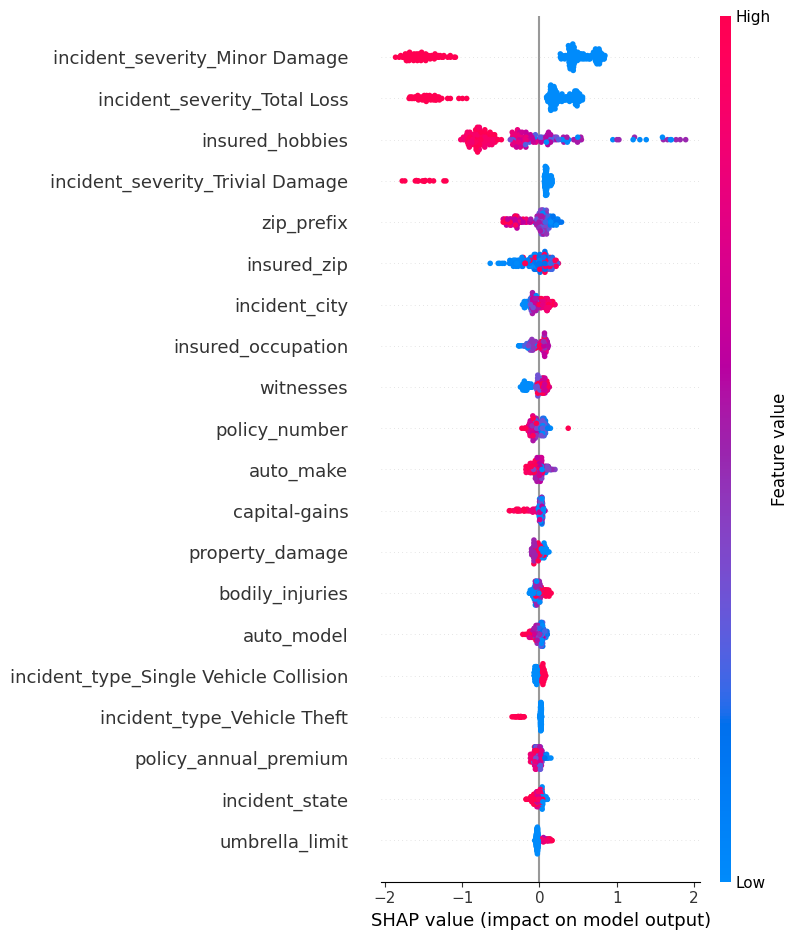

In [84]:
import shap

# Assuming 'cat_model' is your trained CatBoostClassifier
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Plot overall feature importance
shap.summary_plot(shap_values, X_test)

# Optional: Explain a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [85]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f1029b42e6b231d482bdd51a374673a798b9e6b13733b6d39e6abaa7bc9632ec
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [86]:
import lime
import lime.lime_tabular
import numpy as np

# Convert X_test to NumPy if it's a DataFrame
X_test_np = X_test.values
feature_names = X_test.columns.tolist()

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = feature_names,
    class_names = ['Not Fraud', 'Fraud'],
    mode = 'classification'
)

# Pick one prediction (e.g., first row)
i = 0
lime_exp = lime_explainer.explain_instance(
    data_row = X_test_np[i],
    predict_fn = model.predict_proba
)

# Show result in notebook
lime_exp.show_in_notebook(show_table=True)

# Optional: Save HTML
lime_exp.save_to_file('lime_explanation.html')


In [87]:
lime_exp.save_to_file('lime_explanation.html')


In [88]:
#buisness support heavy
def decision_engine(pred_prob, approve_thresh=0.3, manual_review_thresh=0.7):
    """
    Classifies the claim decision based on predicted fraud probability.

    Parameters:
    - pred_prob (float): predicted probability of fraud
    - approve_thresh (float): below this → auto-approve
    - manual_review_thresh (float): above this → send to manual review

    Returns:
    - str: 'Approve', 'Flag', or 'Manual Review'
    """
    if pred_prob < approve_thresh:
        return "Approve"
    elif pred_prob >= manual_review_thresh:
        return "Manual Review"
    else:
        return "Flag"


In [89]:
# Example: Using CatBoost predicted probabilities
probas = model.predict_proba(X_test_np)[:, 1]  # get fraud probability

# Apply decision logic
decisions = [decision_engine(prob) for prob in probas]

# Add to final DataFrame
results_df = X_test.copy()
results_df['fraud_prob'] = probas
results_df['decision'] = decisions

results_df.head()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,time_of_day_evening,time_of_day_late_night,time_of_day_morning,fraud_prob,decision
908,0.704407,0.552994,844117,1.412784,-0.459366,-0.479476,609458,1,144,71,...,False,False,False,False,True,False,True,False,0.002202,Approve
973,0.226378,-0.213229,776950,-0.222383,-0.801762,-0.479476,471585,1,125,78,...,False,False,False,False,False,False,False,False,0.342367,Flag
154,-0.894820,-0.651071,575000,-0.222383,-0.833313,2.568963,619540,0,143,71,...,False,False,False,False,False,True,False,False,0.057443,Approve
977,0.539270,0.334073,929306,-1.039966,-0.666172,1.262489,468454,1,145,65,...,False,False,False,False,False,True,False,False,0.912749,Manual Review
50,1.964667,2.194902,691189,1.412784,0.287708,2.568963,477310,1,144,71,...,False,False,True,False,False,True,False,False,0.006497,Approve


In [90]:
results_df.to_csv("fraud_decision_output.csv", index=False)


In [91]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import os

# Set the root path of your project
project_path = "/content/drive/MyDrive/SmartFraudAPI"

# Create directory if it doesn't exist
os.makedirs(project_path, exist_ok=True)

print(f"✅ Project folder created at: {project_path}")


✅ Project folder created at: /content/drive/MyDrive/SmartFraudAPI


In [93]:
import joblib

# Set path
model_path = "/content/drive/MyDrive/SmartFraudAPI/model.pkl"

# Save model
joblib.dump(model, model_path)

print(f"✅ Model saved at: {model_path}")


✅ Model saved at: /content/drive/MyDrive/SmartFraudAPI/model.pkl


In [94]:
import joblib

# Save model only
model_path = "/content/drive/MyDrive/SmartFraudAPI/model.pkl"
joblib.dump(model, model_path)

print(f"✅ CatBoost model saved at: {model_path}")



✅ CatBoost model saved at: /content/drive/MyDrive/SmartFraudAPI/model.pkl


In [95]:
model_path = "/content/drive/MyDrive/SmartFraudAPI/model.cbm"
model.save_model(model_path)
print(f"✅ Model saved using CatBoost at: {model_path}")


✅ Model saved using CatBoost at: /content/drive/MyDrive/SmartFraudAPI/model.cbm


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1028: UserWarning: [15:57:20] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


In [96]:
# decision_engine.py

def get_decision(score: float) -> str:
    """
    Takes in fraud risk score (0 to 1) and returns decision category.
    """
    if score < 0.3:
        return "✅ Approve"
    elif 0.3 <= score < 0.6:
        return "⚠️ Flag for Manual Review"
    else:
        return "🚨 High Risk – Investigate"


In [97]:
decision_logic = """
def get_decision(score: float) -> str:
    \"\"\"
    Takes in fraud risk score (0 to 1) and returns decision category.
    \"\"\"
    if score < 0.3:
        return "✅ Approve"
    elif 0.3 <= score < 0.6:
        return "⚠️ Flag for Manual Review"
    else:
        return "🚨 High Risk – Investigate"
"""

# Save to SmartFraudAPI folder
with open("/content/drive/MyDrive/SmartFraudAPI/decision_engine.py", "w") as f:
    f.write(decision_logic)

print("✅ decision_engine.py created successfully.")



✅ decision_engine.py created successfully.


In [98]:
!pip install fastapi uvicorn nest-asyncio pyngrok catboost --quiet


In [99]:
fastapi_app_code = """
from fastapi import FastAPI
from pydantic import BaseModel
from fastapi.middleware.cors import CORSMiddleware
import pandas as pd
import catboost

app = FastAPI()

# Allow CORS for local React + ngrok
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Load CatBoost model
model = catboost.CatBoostClassifier()
model.load_model("model.cbm")

# Only collect raw inputs from user (as per your form fields)
class InputData(BaseModel):
    months_as_customer: float
    age: float
    policy_number: int
    policy_deductable: float
    policy_annual_premium: float
    umbrella_limit: float
    insured_zip: int
    insured_sex: str
    insured_education_level: str
    insured_occupation: str
    insured_location: str
    incident_type: str
    collision_type: str
    authorities_contacted: str
    number_of_vehicles_involved: int
    total_claim_amount: float
    property_claim: float
    injury_claim: float
    vehicle_claim: float

@app.post("/predict")
def predict(data: InputData):
    # Convert to DataFrame
    df = pd.DataFrame([data.dict()])

    # 🌟 Feature Engineering
    df["deductable_to_premium_ratio"] = df["policy_deductable"] / df["policy_annual_premium"]
    df["umbrella_to_premium_ratio"] = df["umbrella_limit"] / df["policy_annual_premium"]
    df["net_capital"] = df["total_claim_amount"] - (df["property_claim"] + df["injury_claim"] + df["vehicle_claim"])
    df["had_capital_gain"] = (df["net_capital"] > 0).astype(int)
    df["had_capital_loss"] = (df["net_capital"] < 0).astype(int)

    # Default fields expected by model (you can load these from training too)
    required_columns = model.feature_names_
    for col in required_columns:
        if col not in df.columns:
            df[col] = 0  # Default filler

    # Encoding categorical fields manually (basic one-hot)
    df["insured_sex"] = df["insured_sex"].map({"MALE": 1, "FEMALE": 0})
    df["insured_education_level"] = df["insured_education_level"].astype("category").cat.codes
    df["insured_occupation"] = df["insured_occupation"].astype("category").cat.codes
    df["insured_location"] = df["insured_location"].astype("category").cat.codes
    df["incident_type"] = df["incident_type"].astype("category").cat.codes
    df["collision_type"] = df["collision_type"].astype("category").cat.codes
    df["authorities_contacted"] = df["authorities_contacted"].astype("category").cat.codes

    # Keep only model-required columns
    df = df[required_columns]

    # Make prediction
    pred = model.predict(df)[0]
    confidence = max(model.predict_proba(df)[0])

    return {
        "prediction": int(pred),
        "confidence": round(confidence, 4)
    }

"""

# Save it to main.py
with open("/content/drive/MyDrive/SmartFraudAPI/main.py", "w") as f:
    f.write(fastapi_app_code)

print("✅ Updated FastAPI app saved with full input schema.")


✅ Updated FastAPI app saved with full input schema.


In [100]:
from catboost import CatBoostClassifier

# Example: training with your preprocessed data
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)  # replace with your actual training variables

# Then save it
model.save_model("/content/drive/MyDrive/SmartFraudAPI/model.cbm")




In [103]:
from pyngrok import ngrok
import nest_asyncio
import uvicorn
import threading

# Patch event loop for Colab
nest_asyncio.apply()

# Change directory to your project
%cd /content/drive/MyDrive/SmartFraudAPI

# Create a public URL via Ngrok
public_url = ngrok.connect(8000)
print(f"🚀 Public FastAPI URL: {public_url}")

# Function to run Uvicorn server
def run_api():
    uvicorn.run("main:app", host="0.0.0.0", port=8000)

# Start the FastAPI server in a background thread
api_thread = threading.Thread(target=run_api, daemon=True)
api_thread.start()


/content/drive/MyDrive/SmartFraudAPI
🚀 Public FastAPI URL: NgrokTunnel: "https://3f372db0b7c2.ngrok-free.app" -> "http://localhost:8000"


In [104]:
model.save_model("/content/model.cbm")


In [105]:
from google.colab import files
files.download("/content/model.cbm")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
!ngrok config add-authtoken 30SKX9ykYsfUjiaHk9YOmKx65tS_7EF1uWRJVVq3ddXHDajxk


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
uvicorn main:app --host 0.0.0.0 --port 8000


In [107]:
!uvicorn.run("main:app", host="0.0.0.0", port=8000)


/bin/bash: -c: line 1: syntax error near unexpected token `"main:app",'
/bin/bash: -c: line 1: `uvicorn.run("main:app", host="0.0.0.0", port=8000)'


In [108]:
!ngrok http 8000



ERROR:  authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.
ERROR:  You can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.
ERROR:  Read more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config
ERROR:  You can view your current agent sessions in the dashboard:
ERROR:  https://dashboard.ngrok.com/agents
ERROR:  
ERROR:  ERR_NGROK_108
ERROR:  https://ngrok.com/docs/errors/err_ngrok_108
ERROR:  


In [114]:
from pyngrok import ngrok

# Kill any existing tunnel (important!)
ngrok.kill()

# Start a new tunnel
public_url = ngrok.connect(8000)
print(f"✅ Smart Fraud Detection API is live at: {public_url}")


ERROR:pyngrok.process.ngrok:t=2025-07-28T15:59:43+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

In [110]:
# ✅ Install pyngrok
!pip install pyngrok --quiet

# ✅ Import and connect ngrok
from pyngrok import ngrok

# ✅ Connect to port 8000 (where FastAPI runs)
public_url = ngrok.connect(8000)
print(f"✅ Smart Fraud Detection API is live at: {public_url}")


✅ Smart Fraud Detection API is live at: NgrokTunnel: "https://327f88ddd931.ngrok-free.app" -> "http://localhost:8000"


In [111]:
!python3 app.py

python3: can't open file '/content/drive/MyDrive/SmartFraudAPI/app.py': [Errno 2] No such file or directory


In [112]:
!pip install pyngrok
from pyngrok import ngrok
ngrok.connect(5000)


<NgrokTunnel: "https://9bef19a6ba3b.ngrok-free.app" -> "http://localhost:5000">

In [113]:
!pip install pyngrok
from pyngrok import ngrok
ngrok.connect(5000)

<NgrokTunnel: "https://6c3d0adfc9bc.ngrok-free.app" -> "http://localhost:5000">